In [243]:
# Primero cargamos las librerias necesarias para este examen. Podría estar cargando mas librerias de las necesarias pero es 
# es porque ya son muchas las que ocupamos y las copio y pego de una hoja que tengo, para que nada me falte. Es mejor que sobre. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score

In [61]:
# Segundo, cargamos el primer archivo sobre el cual trabajaremos 

df = pd.read_csv("/content/Option_B_clustering - Option_B_clustering.csv")

In [ ]:
# ***************************************************************************************************************************************************************************
# ====================== ********** REVISION DE LA DATA ********** ====================== #
# ***************************************************************************************************************************************************************************

In [62]:
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


In [ ]:
# Con esto podemos observar que estamos trabajando con columnas numericas, no veo ninguna categorica. 

In [63]:
df.shape

(12737, 13)

In [ ]:
# Tenemos 13 columnas y 12.737 filas. Es una base de datos grande. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


In [ ]:
# De aqui podemos extraer harta informacion. 

# 1) No hay missing values o NaN. Todas las columnas presentan 12.737 datos. 
# 2) Como se menciono anteriormente, todas las columnas son de tipo numericas (y más encima estamos trabajando con puros numeros enteros).
# 3) Confirmamos que hay 13 columnas. Es necesario mencionar que como no tenemos un diccionario sobre el cual trabajar y analizar mejor las columnas, 
# vamos a suponer que no hay columnas que se dupliquen o columnas que sean innecesarias. (No se qué significa assess score 1, 2, 3, 4 y 5).
# 4) Hay columnas que son numericas que podrían entregar mayor informacion si fueran categoricas, como por ejemplo Gender. ¿Qué es 1? ¿Qué es 0? 
# Podríamos realizar un supuesto de que 1 es hombre y 0 mujer. Iremos viendo si es necesario a medida que trabajamos sobre el examen.
# 5) Como no tenemos diccionario de datos, nos costaria mucho mas entender cuando hay datos que no corresponden a las columnas... por ejemplo
# en highest_education, si tenemos un 5, no sabremos si es correcto o no. De todas formas revisaremos las columnas y aplicaremos criterio. 

In [64]:
# Veremos si hay duplicados 

df.duplicated().sum()

7

In [65]:
# Tenemos 7 columnas duplicadas las cuales eliminaremos. No son necesarias. 

df = df.drop_duplicates()

In [66]:
# Confirmamos que se eliminaron

df.duplicated().sum()

0

In [67]:
# Vemos ahora sobre cuantas filas estamos trabajando 

df.shape

(12730, 13)

In [ ]:
# Efectivamente se eliminaron solo 7 filas, por lo que ahora nuestra base de datos cuenta con 12.730 filas. 

In [ ]:
# Revisaremos ahora las columnas para ver si hay algun dato extraño que pueda parecer un error.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12730 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12730 non-null  int64
 1   highest_education     12730 non-null  int64
 2   imd_band              12730 non-null  int64
 3   age_band              12730 non-null  int64
 4   num_of_prev_attempts  12730 non-null  int64
 5   studied_credits       12730 non-null  int64
 6   disability            12730 non-null  int64
 7   passed_course         12730 non-null  int64
 8   assess_score_1        12730 non-null  int64
 9   assess_score_2        12730 non-null  int64
 10  assess_score_3        12730 non-null  int64
 11  assess_score_4        12730 non-null  int64
 12  assess_score_5        12730 non-null  int64
dtypes: int64(13)
memory usage: 1.4 MB


In [23]:
df["gender"].value_counts() 

0    7042
1    5688
Name: gender, dtype: int64

In [ ]:
# Solo dos numeros: 0 y 1, acorde con los dos unicos sexos que existen de manera biologica, hombre y mujer. 

In [24]:
df["highest_education"].value_counts()

3    5916
1    4737
2    1897
0      98
4      82
Name: highest_education, dtype: int64

In [ ]:
# Podemos observar que tenemos 5 niveles de educacion. Los extremos 0 y 4 son los que menos cantidad de personas tienen, mientras que la masa se 
# concentra en los niveles de educacion 1 y 3. 

In [25]:
df["imd_band"].value_counts()

3    1486
2    1338
5    1317
1    1300
4    1285
7    1259
6    1246
0    1184
8    1181
9    1134
Name: imd_band, dtype: int64

In [ ]:
# El indice de privacion economica posee 10 niveles (de 0 a 9) y por lo que se puede apreciar se distribuye de manera muy homogenea 
# en la muestra que estamos estudiando. 

In [26]:
df["age_band"].value_counts()

0    8507
1    4128
2      95
Name: age_band, dtype: int64

In [29]:
df["age_band"].describe()

count    12730.000000
mean         0.339199
std          0.488965
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: age_band, dtype: float64

In [ ]:
# No entiendo bien que significa esta columna, pero supondremos que no hay nada de malo en ella. 

In [30]:
df["num_of_prev_attempts"].value_counts()

0    11634
1      886
2      165
3       33
4        8
5        3
6        1
Name: num_of_prev_attempts, dtype: int64

In [31]:
df["num_of_prev_attempts"].describe()

count    12730.000000
mean         0.107463
std          0.389890
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: num_of_prev_attempts, dtype: float64

In [ ]:
# No entiendo bien que significa esta columna, pero supondremos que no hay nada de malo en ella. 

In [33]:
df["studied_credits"].describe()

count    12730.000000
mean        74.773763
std         37.459380
min         30.000000
25%         60.000000
50%         60.000000
75%         90.000000
max        630.000000
Name: studied_credits, dtype: float64

In [ ]:
# Uno podría pensar que esta columna significa creditos estudiados (creditos es una forma de decir en la universidad como las 
# horas invertidas en el ramo, curso o año de estudio). Me parece algo exagerado 630 creditos estudiados. Uno podría pensar que se le pasó el 0. 
# Veamos ese dato mas de cerca. 

In [35]:
df.loc[(df['studied_credits'] == 630)]

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
5124,0,3,9,1,0,630,1,1,100,92,94,91,92


In [ ]:
# Esta persona, pertenece al grupo 3 de highest education. Supondremos que el grupo 0 es el que tiene menos educacion y el grupo 4 es el que tiene 
# mas educacion. Esta persona que invirtio 630 creditos estudiados, no pertenece al nivel mas alto de educacion, sino que al segundo mas alto. Su IMB 
# es de nivel 9, o sea que es del grupo socioeconomico con menos privaciones, lo cual concuerda (suele suceder que las personas con menores privaciones 
# socioeconomicas, son las que obtienen mayores grados de educacion).

In [ ]:
df["studied_credits"].value_counts(ascending=False)

In [ ]:
# Y antes de los 630 creditos estudiados, estan los 430. Supondremos que esta bien, será un dato atipico, pero real (perfectamente podría ser yo jajaja).

In [37]:
df["disability"].value_counts()

0    11560
1     1170
Name: disability, dtype: int64

In [38]:
df["disability"].describe()

count    12730.000000
mean         0.091909
std          0.288909
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: disability, dtype: float64

In [ ]:
# Tenemos esta columna (discapacidad) con dos valores posibles (acorde al titulo). La persona es o no es discapacitada (0 o 1). esta
# columna se ve okey por lo que seguiremos. 

In [39]:
df["passed_course"].value_counts()

1    9713
0    3017
Name: passed_course, dtype: int64

In [ ]:
# Al igual que en la anterior, la persona pasó o no pasó de curso. Lo cual tiene solo dos posibles resultados 0 o 1. 

In [ ]:
# Las siguientes columnas las trataré como una sola dado que, por el titulo que poseen, puedo intuir que significan lo mismo solo que 
# la muestra esta agrupada. Por ejemplo, clasificada segun el puntaje que poseen como alumno. Puedo intuir tambien que 
# mientras mas puntaje, mejor le fue al alumno (o mejor es su situacion). Estos grupos pueden estar creados por varios factores en comun, 
# pero creo que el mas "justo" es por indice de privacion economica (entiendo que de este grupo son 10 pero podrian haberlo agrupado en 2).

In [42]:
df["assess_score_1"].describe()

count    12730.000000
mean        73.987274
std         19.166495
min          0.000000
25%         66.000000
50%         77.000000
75%         86.000000
max        100.000000
Name: assess_score_1, dtype: float64

In [43]:
df["assess_score_2"].describe()

count    12730.000000
mean        74.915240
std         14.654117
min          0.000000
25%         66.000000
50%         76.000000
75%         86.000000
max        100.000000
Name: assess_score_2, dtype: float64

In [44]:
df["assess_score_3"].describe()

count    12730.000000
mean        79.734328
std         17.653542
min          0.000000
25%         69.000000
50%         81.000000
75%         95.000000
max        100.000000
Name: assess_score_3, dtype: float64

In [45]:
df["assess_score_4"].describe()

count    12730.000000
mean        75.661822
std         17.967908
min          0.000000
25%         65.000000
50%         79.000000
75%         89.000000
max        100.000000
Name: assess_score_4, dtype: float64

In [46]:
df["assess_score_5"].describe()

count    12730.000000
mean        78.106127
std         19.529946
min          0.000000
25%         67.000000
50%         80.000000
75%         96.000000
max        100.000000
Name: assess_score_5, dtype: float64

In [ ]:
# Todos tienen alrededor de los mismos datos numericos, no hay ninguno que muestre algo muy exagerado, por lo que intuiremos que esta todo bien. 

In [ ]:
# ***************************************************************************************************************************************************************************
# ====================== ********** PARTE 1: INSTRUCCIONES DE AGRUPACION ********** ====================== # 
# ***************************************************************************************************************************************************************************

In [69]:
# Vamos a escalar los datos, para prepararlos para el modelo:

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1.112675,-0.095762,1.636668,3.396696,-0.275634,4.410984,-0.318137,0.557328,0.209370,0.688213,0.015050,0.519735,0.199387
1,-0.898735,-0.095762,-0.857748,1.351481,-0.275634,-0.394410,-0.318137,0.557328,-0.208042,-0.471916,-0.551431,-0.649062,-0.927132
2,-0.898735,0.967056,0.211288,1.351481,-0.275634,-0.394410,-0.318137,0.557328,-0.103689,-0.267187,-0.324839,0.686706,-0.159051
3,-0.898735,-1.158580,0.211288,-0.693734,-0.275634,-0.394410,-0.318137,0.557328,-0.260218,-3.065146,-0.947968,-2.263114,-0.159051
4,1.112675,-0.095762,-0.501402,-0.693734,-0.275634,-0.394410,-0.318137,0.557328,-0.208042,-0.676645,-1.004616,-0.036835,-0.517489


In [ ]:
# Para lograr utilizar el modelo de Kmedias, primero debo entender cual es el grupo de clusteres adecuado para el modelo, por lo que 
# para que sea mas sencilla su interpretacion, ocuparemos los graficos aprendidos: 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

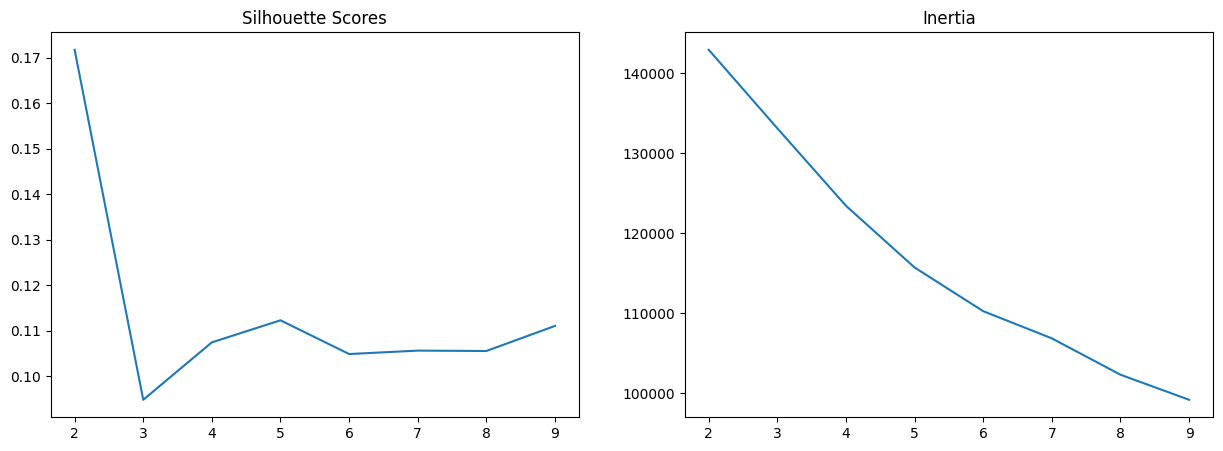

In [70]:
ks = range(2,10)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
# Con el metodo del codo, es un poco dificil encontrar esa reduccion drastica en el eje de la inercia. A simple vista, no podría decir nada en cuanto a 
# cuantos clusteres son los adecuados para trabajar, pero si me aventuro a dar un numero bajo este metodo, diría que 5 o 6 clusteres, podrían ser los adecuados. 

In [ ]:
# Con el metodo de la siluetta, es mucho mas facil observar la cantidad de clusteres que debemos aplicar. Entendiendo que mientras mas alta sea la 
# puntuacion de la siluetta es mejor, podemos decidir que el numero de clusteres adecuado para el modelo es 2.

In [ ]:
# De lo anterior, escogeremos el 2 como numero de clusteres. 

In [71]:
# Ahora aplicamos el modelo kmeans con 2 clusteres:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Agregamos el numero de clusteres al dataframe en su propia columna. 
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,cluster
0,1,2,9,2,0,240,0,1,78,85,80,85,82,0
1,0,2,2,1,0,60,0,1,70,68,70,64,60,1
2,0,3,5,1,0,60,0,1,72,71,74,88,75,0
3,0,1,5,0,0,60,0,1,69,30,63,35,75,1
4,1,2,3,0,0,60,0,1,70,65,62,75,68,1


In [73]:
# Lo que hacemos ahora, es que agrupamos el dataframe de acuerdo a los clusters (los 2 escogidos) y hacemos que nos muestre el promedio de cada columna (esto es para 
# tener una idea mas general de los valores).
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,0,0.429080,2.157864,4.702077,0.372582,0.078576,71.621365,0.075252,0.90908,79.677864,80.568665,86.631335,83.343976,86.289733
1,1,0.481533,1.957491,3.829733,0.273868,0.163995,80.943089,0.124506,0.47712,62.850639,63.851336,66.236702,60.627642,62.090592


In [ ]:
# Y por ultimo vamos a graficar el promedio de cada columna de acuerdo al cluster al cual pertenezca. 

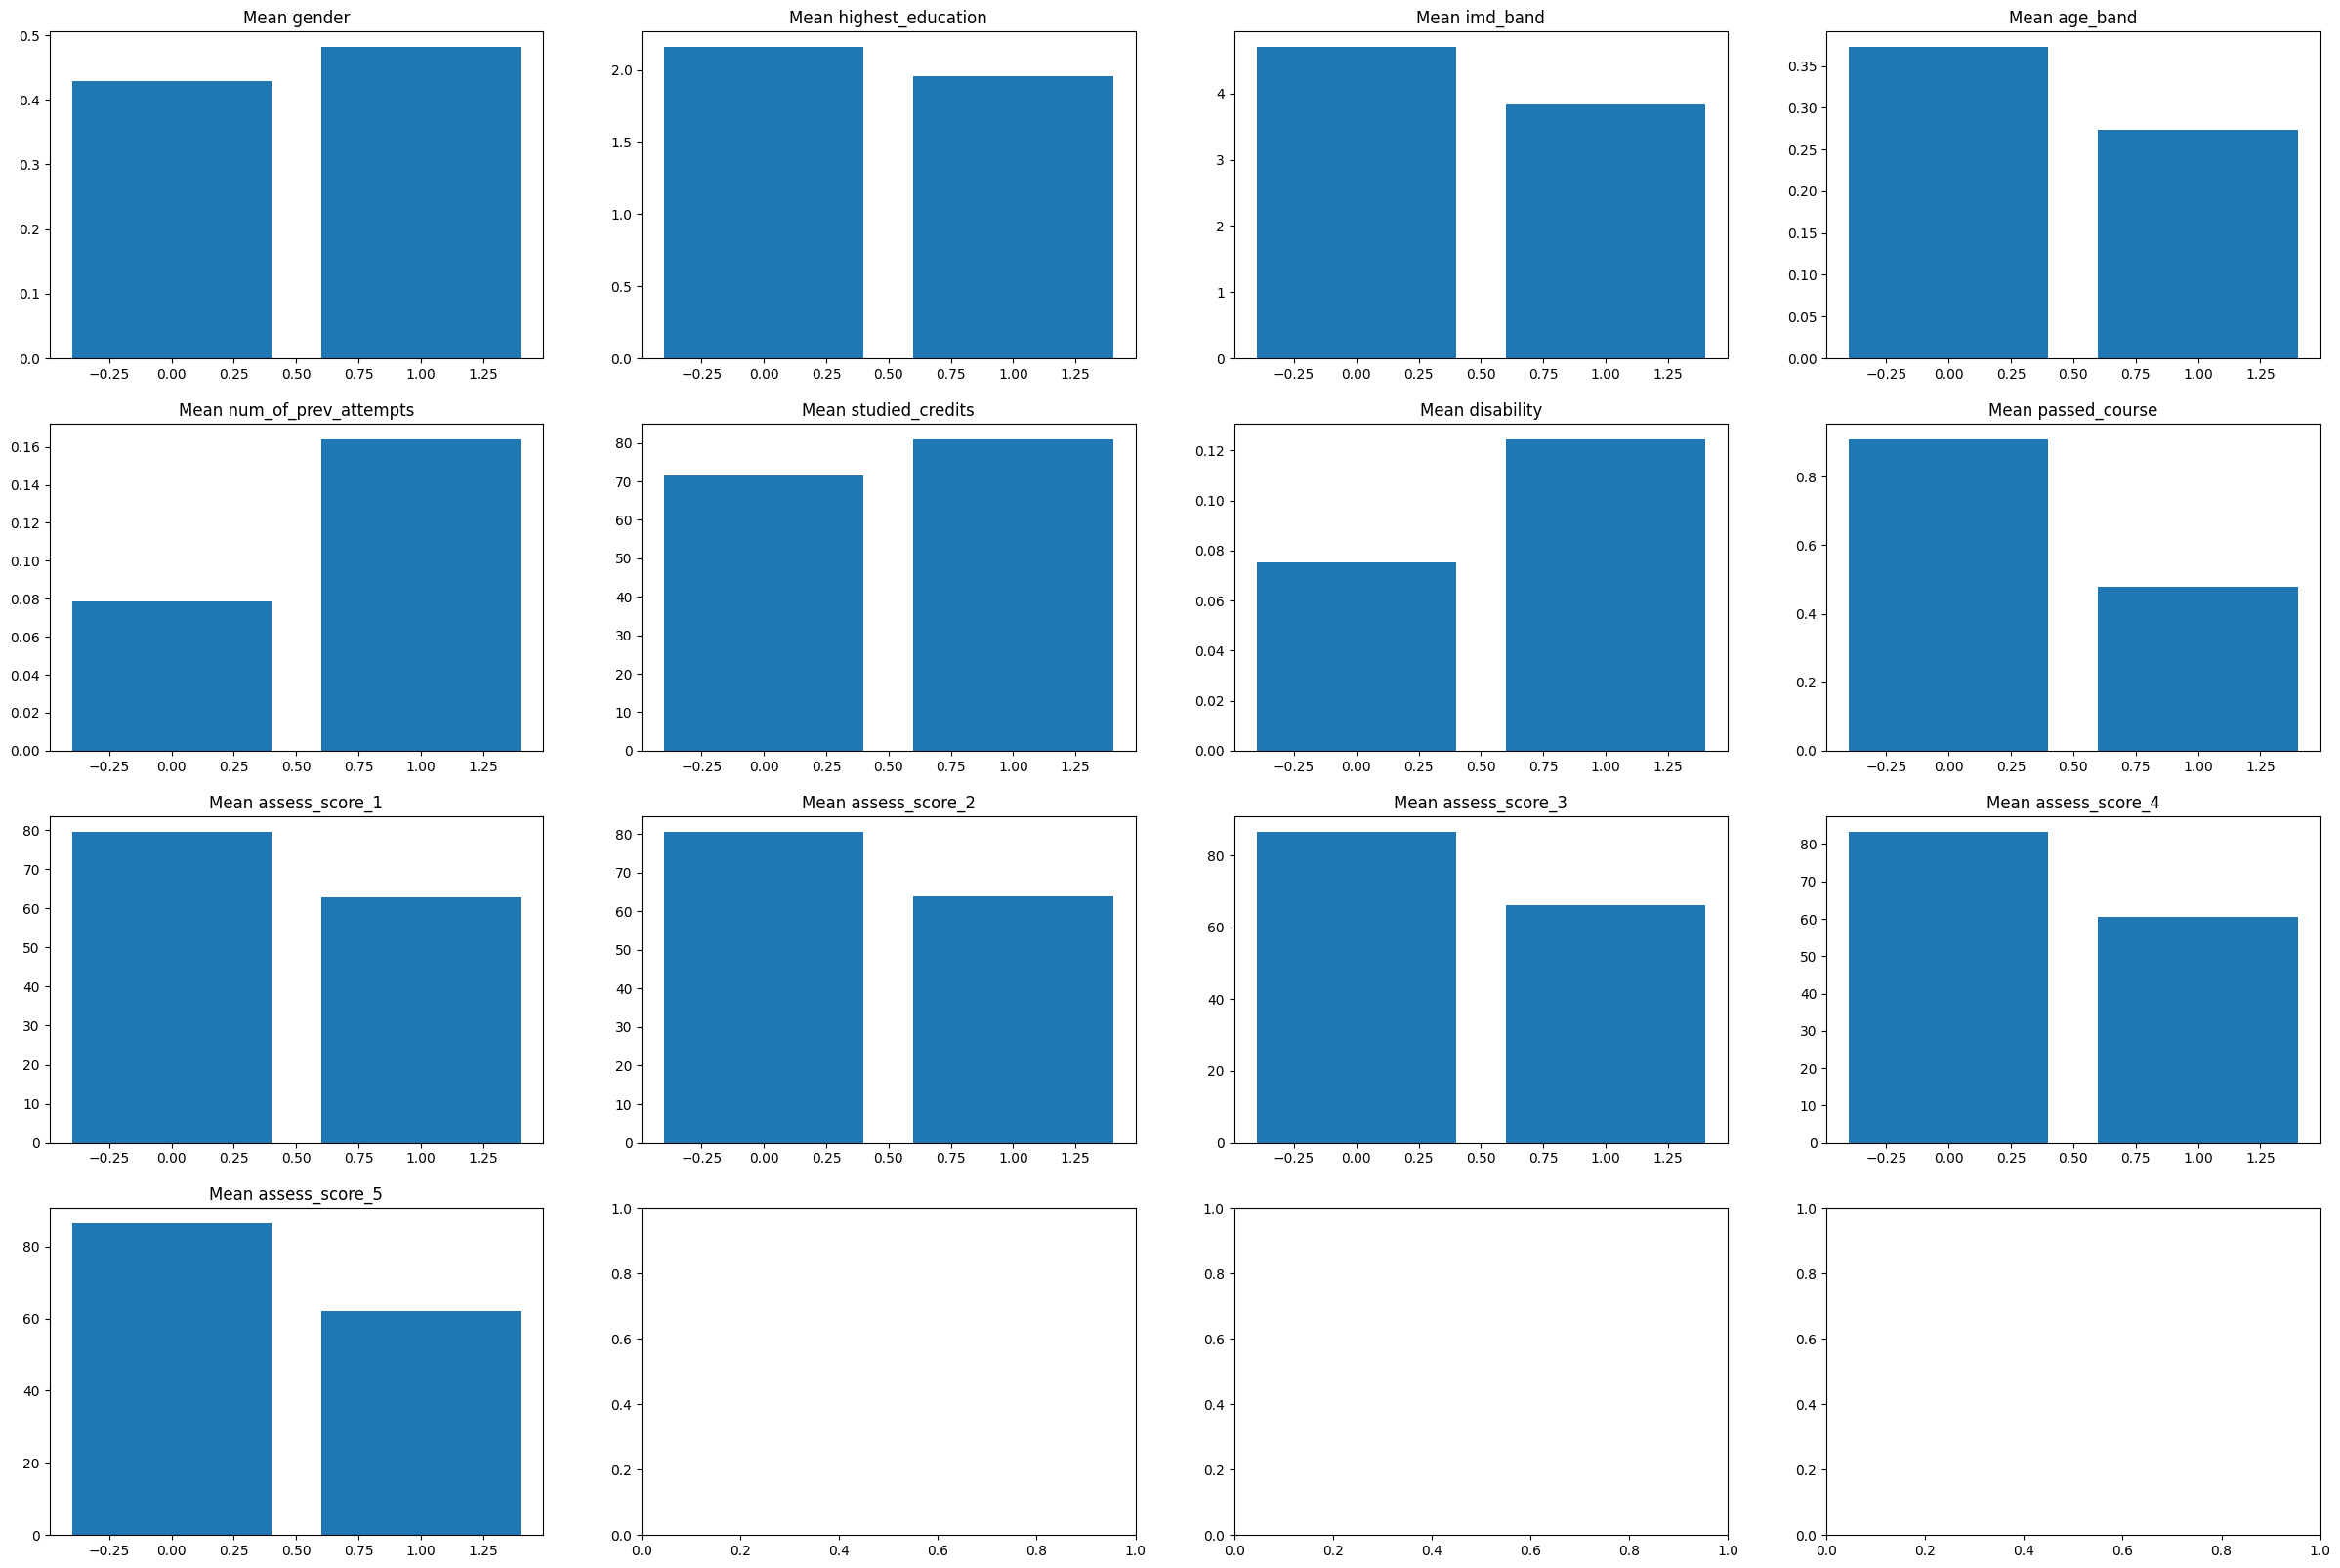

In [82]:
fig, axes = plt.subplots(4,4, figsize = (30, 20))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [ ]:
# El modo de interpretacion será de acuerdo a los clusters. Tomaremos un cluster e iremos grafico por grafico interpretando el resultado, para luego, hacer lo mismo 
# con el segundo clusters y asi, finalmente, obtener la conclusion final. 

In [ ]:
# En el cluster 2 podemos observar que el promedio de edad es mayor que en el cluster 1. Los del cluster 2 han llegado a un nivel educacional levemente menor
# que en el cluster 1 lo cual concuerda con el siguiente punto que corresponde al indice de privacion multiple. Este indice en el cluster 2 es mucho mas bajo 
# que en el cluster 1 lo cual indica que los del primer grupo mencionado pertenecen a un grupo de personas que estan en un vecindario mas desfavorecido. Tambien,
# los del cluster 2 poseen mayores personas con discapacidad que los del cluster 1. Esto ultimo podria tener sentido si consideramos que este grupo es el mismo 
# que contempla a las personas que viven en un vecindario mas desfavorecido. El promedio de los creditos tenidos por estudio es mayor en el cluster 2 que en el cluster 1
# pero los cursos aprobados son mayores en el cluster 1 que en el cluster 2 lo cual podría significar (y aventurandome harto en la conclusion) que la cantidad de 
# repitentes en el cluster 2 es mucho mayor que en el cluster 1. Los graficos que indican Assess_Score (ya sea 1, 2, 3, 4 o 5) no se qué significan exactamente. Pero,
# se puede observar un comportamiento muy mantenido entre esos graficos y es que el cluster 1 siempre tiene un score mayor que el cluster 2. 

In [ ]:
# Como conclusion final, es que los alumnos del cluster 2 parecen necesitar de mas ayuda que los del cluster 1. Ayuda ya sea para aprobar los cursos 
# o para mejorar su situacion (de acuerdo al imd band) para que rindan mejor. 

In [ ]:
# ***************************************************************************************************************************************************************************
# ====================== ********** PARTE 2: INSTRUCCIONES DE MODELADO ********** ====================== # 
# ***************************************************************************************************************************************************************************

In [208]:
# Dado que esta segunda parte consta de una base de datos diferente a la primera, la volveremos a cargar.
# No volveremos a cargar las librerias dado que eso queda en el colab. 

df = pd.read_csv("/content/Option_B_modeling.csv")

In [ ]:
# Comentan en la pagina del examen que esta base de datos se limpia previamente. De todas formas, no confio jajajaja. Correré los 
# codigos pero me ahorraré la explicacion, es mas que nada para asegurarme que este todo bien. 

In [130]:
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,...,0,0,0,0,0,0,0,1,0,0


In [131]:
df.shape # 931 columnas... son muchas

(12737, 931)

In [ ]:
# df.info() # Claramente no puedo hacer un info con casi 1000 columnas.... 

In [132]:
df.duplicated().sum() # No tenemos duplicados

0

In [133]:
df.isna().sum().sum() # No hay valores NaN 

0

In [ ]:
# Supondre, por lo que veo, que son puras columnas integer, o sea de numeros enteros. Ademas, supondre que no hay columnas duplicadas. 

In [ ]:
# Ahora viene la parte de preparar los datos para el modelo:
# 1) Primero los vamos a separar en X e y y nuestra variable objetivo de acuerdo a la pagina es passed_course
# 2) Segundo vamos a escalar los datos, dado que siempre antes de aplicar el PCA se deben escalar. 
# 3) Tercero aplicamos PCA
# 4) Cuarto vamos a aplicar el train test split. 

In [110]:
df["passed_course"].value_counts() # Esta ya es una variable binaria, numerica. Asi que demosle 

1    9720
0    3017
Name: passed_course, dtype: int64

In [209]:
# 1) Separación

X = df.drop(columns = 'passed_course')
y = df['passed_course'] 

In [210]:
# 2) Escalar

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [211]:
# 3) Aplicar PCA

pca = PCA()
pca.fit(scaled_df)

PCA()

In [ ]:
# Debemos ahora escoger los componentes, por lo que lo veremos con el grafico que agrega sucesivamente la varianza y el de sedimentacion

Text(0, 0.5, 'Proportion of Explained Variance')

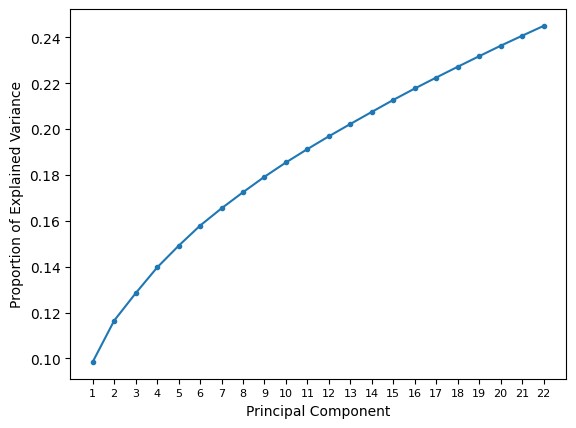

In [155]:
# Grafico que agrega la varianza porcentual sucesivamente:

plt.plot(range(1, 23), pca.explained_variance_ratio_[:22].cumsum(), marker='.')
plt.xticks(ticks = range(1, 23), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [ ]:
# Con ayuda de ChatGPT, cree este grafico que me indica la varianza que se acumulando porcentualmente a medida que vamos agregando las variables (o columnas)
# que explican el objetivo. Es normal que la primera variable explique un poco mas que el resto, pero a medida que se van agregando, va disminuyendo la 
# explicacion agregada que puede otorgar. 

In [ ]:
# Y nuevamente con ayuda de ChatGPT (perdon ;( jajajajaja) cree el grafico del codo para ver el numero de componentes de debo aplicar en el PCA. 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

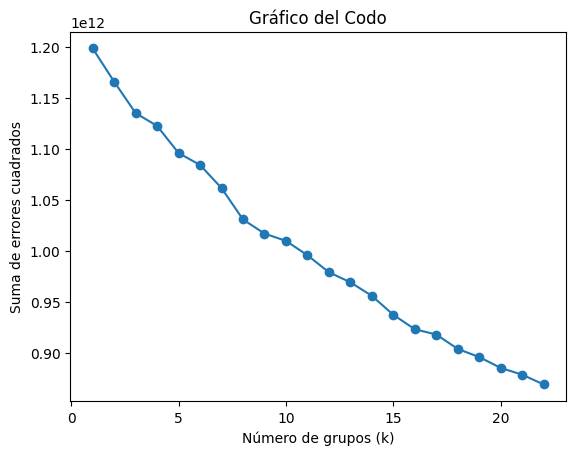

In [161]:
sse = [] # Suma de errores cuadrados

for k in range(1, 23):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Graficar el gráfico del codo
plt.plot(range(1, 23), sse, marker='o')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Suma de errores cuadrados')
plt.title('Gráfico del Codo')
plt.show();

In [ ]:
# Por el metodo del codo podemos observar que el numero de componentes adecuado para el modelo corresponde a 7. Pero para verlo mejor, lo que podriamos hacer 
# es disminuir la cantidad de componentes totales que muestre el grafico.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

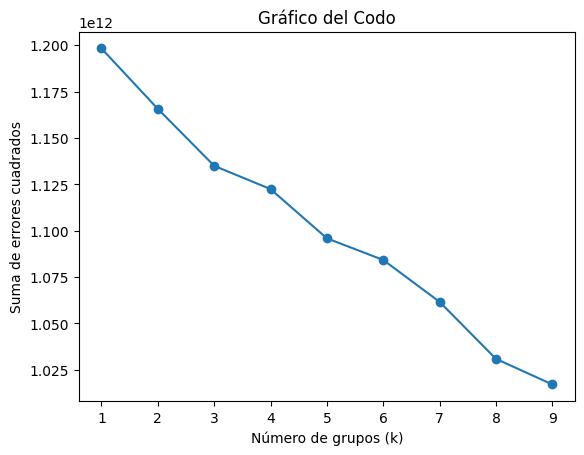

In [212]:
sse = [] # Suma de errores cuadrados

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Graficar el gráfico del codo
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Suma de errores cuadrados')
plt.title('Gráfico del Codo')
plt.show();

In [ ]:
# Aqui se puede observar con mayor claridad, que el numero de componentes adecuado para el modelo es 7.

In [ ]:
# Lo que sigue a continuacion es aplicar el PCA pero con 7 componentes: 

In [213]:
pca7 = PCA(n_components=7)
X_PCA = pca7.fit_transform(scaled_df)

In [ ]:
# Nos piden comparar cuantas columnas estan presentes antes y despues del PCA 

In [214]:
X.shape # Antes del PCA

(12737, 930)

In [215]:
X_PCA.shape # Despues del PCA

(12737, 7)

In [ ]:
# Lo que podemos decir es que el PCA nos ayudo a disminuir drasticamente el numero de columnas de 930 a 7. O sea, una reduccion de 923 columnas. 

In [216]:
# Ahora podemos dividir los datos con el test train split

X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, random_state=42)

In [217]:
# Creamos un pipeline. Ya escalamos los datos y este paso es bueno para evitar fugas.

transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

In [218]:
# Un pipeline dentro de otro añadiendole la regresion logistica. 

logreg = LogisticRegression()
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

In [220]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.826214405360134
Testing accuracy: 0.8298273155416013


In [ ]:
# Pasamos de tener 930 columnas a 7 columnas y el modelo se sigue explicando super bien, con un accuracy de un 83%. 

In [ ]:
# Ahora, iremos mas profundo. Vamos en el paso 6 de la segunda parte donde se nos pide usar un modelo de aprendizaje profundo para predecir qué estudiantes 
# aprobarán y cuales no. Para ello debo crear 3 versiones diferentes de un modelo secuencial. Veamos: 

In [221]:
# Debemos definir nuestra estructura de red. Tenemos 7 columnas, por lo que ese será el maximo de neuronas en la primera capa. 

input_shape = X_train.shape[1]
input_shape

7

In [222]:
# En el examen, nos piden que utilicemos un modelo secuencial:

model = Sequential()

In [ ]:
# Tambien, nos comentan que debemos crear 3 versiones diferentes de un modelo secuencial. 

In [ ]:
# =========== Primera version: ===========

In [223]:
# Primera capa oculta
model.add(Dense(7, # Tengo 7 neuronas en mi primera capa 
                input_dim = input_shape,
                activation = 'relu')) 
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [203]:
# Las 7 neuronas de la primera capa, es el maximo a utilizar dado el numero de columnas que poseo despues de hacer el PCA. 

In [224]:
# Paso 2: Compilar 

model.compile(loss = 'bce', optimizer = 'adam')

In [ ]:
# Esta compilacion utiliza la perdida de entropia cruzada binaria (bce) porque es un problema de clasificacion binaria. 
# Recordemos que la pregunta en un inicio es si el alumno aprobara o no el curso (problema binario).

In [225]:
# Paso 3: Ajustar el modelo 

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
299/299 [==============================] - 1s 2ms/step - loss: 0.7834 - val_loss: 0.5605
Epoch 2/10
299/299 [==============================] - 1s 2ms/step - loss: 0.5223 - val_loss: 0.5049
Epoch 3/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4832 - val_loss: 0.4793
Epoch 4/10
299/299 [==============================] - 0s 2ms/step - loss: 0.4598 - val_loss: 0.4614
Epoch 5/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4444 - val_loss: 0.4486
Epoch 6/10
299/299 [==============================] - 0s 2ms/step - loss: 0.4331 - val_loss: 0.4388
Epoch 7/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4251 - val_loss: 0.4320
Epoch 8/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4187 - val_loss: 0.4244
Epoch 9/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4139 - val_loss: 0.4190
Epoch 10/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4101 - val_loss: 0.4142

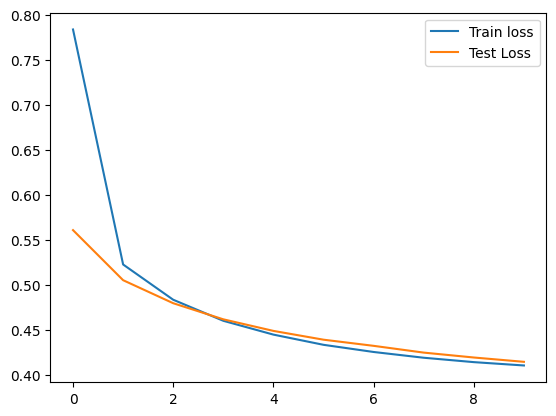

In [226]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
# La linea azul es la perdida de entrenamiento y la linea naranja es la perdida de prueba. Lo que queremos (y conseguimos) es que ambas perdidas
# disminuyan lo mas cerca posible de 0. Cuanto menor sea nuestra perdida, mejor será nuestro modelo. 

In [ ]:
# Lo que haremos a continuacion, será evaluar el modelo con algunas metricas, para ver que tan bueno es:

In [ ]:
# Metrica 1: Loss

In [236]:
loss = model.evaluate(X_test, y_test)
loss

100/100 [==============================] - 0s 2ms/step - loss: 0.4222


0.4221791923046112

In [ ]:
# La metrica loss nos indica la discrepancia que hay entre las predicciones del modelo y los valores reales. En este caso, la metrica loss nos dio un valor
# de 0.422 lo que significa que en promedio, el modelo tiene una discrepancia de alrededor de 0.42 entre las predicciones y los valores reales. 

In [ ]:
# Metrica 2: recall

In [245]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

100/100 [==============================] - 0s 3ms/step


0.9486967314853124

In [ ]:
# Con ayuda de Chat GPT, obtenemos el valor de la metrica recall, la cual es 0.9486. Este valor es super favorable para nosotros dado que a medida
# que la metrica recall arroje un valor mas alto, es porque el modelo puede identificar la mayoria de las muestras positivas. 

In [ ]:
# Metrica 3: Accuracy

In [247]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

100/100 [==============================] - 0s 1ms/step


0.8427001569858713

In [ ]:
# Y por ultimo, la tercera metrica corresponde a la accuracy. Esta, nos indica la proporcion de muestras correctamente clasificadas en relacion
# con el total de muestras. Dado que nuevo valor es de 0.8427, tenemos que el modelo esta clasificando muy bien la mayoria de la muestra. 

In [ ]:
# =========== Segunda version: ===========

In [248]:
# Primera capa oculta
model.add(Dense(7, # Tengo 7 neuronas en mi primera capa
                input_dim = input_shape,
                activation = 'relu')) 
# Segunda capa oculta
model.add(Dense(5, # Tengo 5 neuronas en mi segunda capa.
                activation = 'relu'))
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Lo que hice aqui fue agregar una segunda capa de 5 neuronas. Escogí 5 porque es el numero que mejor se adapta a los resultados que quiero.
# Probe con los demas numeros y me daban resultados feos. 

In [249]:
# Paso 2: Compilar 

model.compile(loss = 'bce', optimizer = 'adam')

In [250]:
# Paso 3: Ajustar el modelo 

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
299/299 [==============================] - 2s 3ms/step - loss: 0.5988 - val_loss: 0.4991
Epoch 2/10
299/299 [==============================] - 1s 3ms/step - loss: 0.4782 - val_loss: 0.4689
Epoch 3/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4544 - val_loss: 0.4485
Epoch 4/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.4428
Epoch 5/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4371 - val_loss: 0.4419
Epoch 6/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4328 - val_loss: 0.4347
Epoch 7/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4296 - val_loss: 0.4272
Epoch 8/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4261 - val_loss: 0.4243
Epoch 9/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4233 - val_loss: 0.4224
Epoch 10/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4208 - val_loss: 0.4206

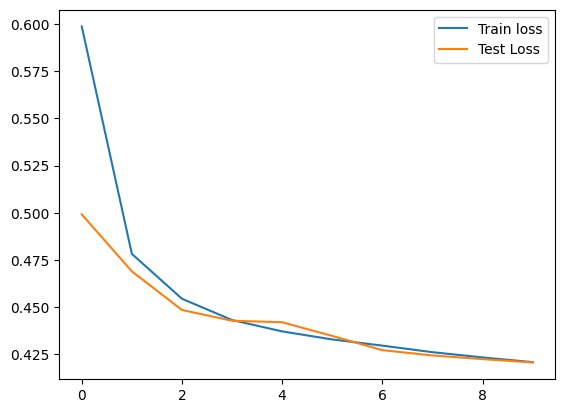

In [251]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
# Tenemos que ahora, la perdida es mayor, lo cual significa que al haber agregado una segunda capa oculta, es mucho mejor para el modelo. Y tanto el 
# train loss como el test loss, se acoplan al final de la curva, lo que nos indica que se comportan de la misma manera en esa instancia, lo cual tambien es bueno.

In [ ]:
# Lo que haremos a continuacion, por segunda vez, será evaluar el modelo con algunas metricas, para ver que tan bueno es:

In [ ]:
# Metrica 1: Loss

In [252]:
loss = model.evaluate(X_test, y_test)
loss

100/100 [==============================] - 0s 1ms/step - loss: 0.4206


0.4206239879131317

In [ ]:
# En este caso, versus el anterior, el rendimiento del modelo mejoro un poquito. Antes teniamos un valor de 0.422 y ahora es un valor de 0.420, lo 
# que implica una mejora, muy pequeña, pero mejora al fin y al cabo. (el significado e interpretacion ya lo di antes, no lo daré ahora ni mas
# adelante para no ser tan repititiva. Solo comparare resultados y dire si mejoro o no).

In [ ]:
# Metrica 2: recall

In [253]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

100/100 [==============================] - 0s 1ms/step


0.9515928837401738

In [ ]:
# Al igual que en el caso anterior, podemos ver esta metrica recall, al haber agregado una capa con 5 neuronas, mejoro. Antes, el valor era de 0.9486
# y ahora es de 0.9515. O sea que mejoró, el modelo logra identificar de mejor manera la mayoria de las muestras positivas. 

In [ ]:
# Metrica 3: Accuracy

In [254]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

100/100 [==============================] - 0s 940us/step


0.8458398744113029

In [ ]:
# Antes, el valor del accuracy era de 0.8427 y ahora es de 0.8458. De la misma forma que antes, esta metrica indica que el modelo mejoró en cuanto a la 
# clasificacion que le da a la mayoria de los alumnos (en si aprobo o no), versus al modelo sin la segunda capa de 5 neuronas. 

In [ ]:
# =========== Tercera version: ===========

In [255]:
# Agregamos una regularizacion

model = keras.Sequential([
    layers.Dense(7, 
                 input_dim=input_shape, 
                 activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(5, 
                 activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, 
                 activation='sigmoid')
])

In [ ]:
# Aqui aplique la regularizacion L2 para controlar el sobreajuste por si hubiera algun coeficiente demasiado grande dentro del modelo. 
# Otra razon por la que aplique el L2 es porque quiero que el modelo no sea tan sensible a las variaciones pequeñas de los datos de entrenamiento,
# porque estamos trabajando con un gran volumen de datos y la idea es que el modelo se mantenga lo mas estable posible para obtener buenas predicciones. 
# Ahora, veremos si realmente cumple las expectativas antes propuestas, cuando miremos las metricas. 

In [256]:
# Paso 2: Compilar 

model.compile(loss = 'bce', optimizer = 'adam')

In [257]:
# Paso 3: Ajustar el modelo 

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
299/299 [==============================] - 1s 2ms/step - loss: 0.7014 - val_loss: 0.5981
Epoch 2/10
299/299 [==============================] - 1s 3ms/step - loss: 0.5572 - val_loss: 0.5259
Epoch 3/10
299/299 [==============================] - 1s 2ms/step - loss: 0.5027 - val_loss: 0.4927
Epoch 4/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4764 - val_loss: 0.4712
Epoch 5/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4597 - val_loss: 0.4560
Epoch 6/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4480 - val_loss: 0.4464
Epoch 7/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4391 - val_loss: 0.4378
Epoch 8/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4329 - val_loss: 0.4322
Epoch 9/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4280 - val_loss: 0.4284
Epoch 10/10
299/299 [==============================] - 1s 2ms/step - loss: 0.4242 - val_loss: 0.4251

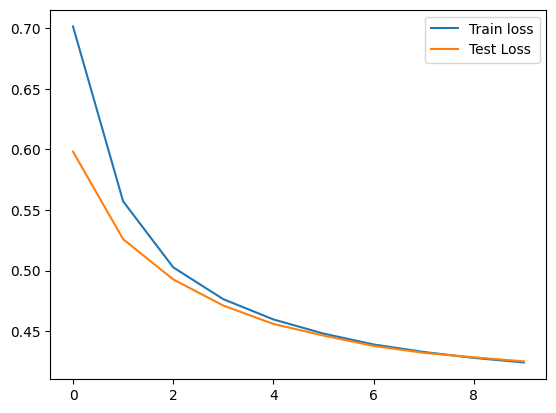

In [258]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
# La perdida pareciera no ser mayor que en el resto de las versiones del modelo. Es alrededor del 0.425, que es exactamente el mismo numero de las otras dos versiones. 
# Lo que tiene de interesante este modelo es que el train loss y el test lost se ajustan o se acomplan mucho antes que en el resto de las versiones, lo cual es bueno
# porque buscamos que tengan el mismo comportamiento (para no tener un sobre ajuste o sub ajuste). Por lo tanto, se podría decir que mejoramos, porque el valor de la perdida
# se mantiene, pero el modelo entre el train y el test se asemejan mas. 

In [ ]:
# Lo que haremos a continuacion, por tercera y ultima vez, será evaluar el modelo con algunas metricas, para ver que tan bueno es:

In [ ]:
# Metrica 1: Loss

In [259]:
loss = model.evaluate(X_test, y_test)
loss

100/100 [==============================] - 0s 1ms/step - loss: 0.4251


0.42510586977005005

In [ ]:
# El valor de la metrica loss aumentó levemente con respecto a la version 1 y 2, lo cual, no es bueno. Hasta ahora, de acuerdo a esta metrica, 
# la mejor version de modelo es el 2. Que haya aumentado el loss significa que aumentaron las discrepancias entre las predicciones y los valores
# reales, lo cual dice que nuestro modelo empeoro en cuanto a su capacidad predictiva. 

In [ ]:
# Metrica 2: recall

In [260]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

100/100 [==============================] - 0s 1ms/step


0.9470417873396773

In [ ]:
# Al igual que en el caso anterior, al parecer, haber agragado el regularizador L2 no fue buena idea. Es segunda metrica que nos empeora el modelo. 
# Antes, en la version 1 el valor era de 0.9486, en la version 2 era de 0.9515 y en esta es de 0.9470. Es la peor version de las tres por segunda 
# metrica consecutiva. 

In [ ]:
# Metrica 3: Accuracy

In [261]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

100/100 [==============================] - 0s 977us/step


0.8436420722135007

In [ ]:
# Aqui tenemos algo diferente. Si bien esta metrica empeoro en comparacion con la segunda version del modelo, con respecto a la primera, esta metrica esta 
# levemente mejor. Si comparamos los datos son V1: 0.8427, V2: 0.8458 y V3: 0.8436. Recordar que para esta metrica, mientras mas alto nos de el valor, 
# significa que esta version del modelo tiene una mejor precision lo cual implica que la clasificacion que hace para saber si el alumno aprueba o no, es buena,
# pero no tanto como en la segunda version. 

In [ ]:
# =================== Parte final del examen ===================

In [ ]:
# El modelo final que escogeré será el de la version 2. De acuerdo a las metricas que observamos, la version 2 es la que tiene mejores valores en las 
# metricas evaluadas lo cual implica que el modelo en la version 2 explica super bien las predicciones realizadas (de acuerdo con la muestra de entrenamiento).
# El modelo final (el que escogí como modelo final) ya fue medido con multiples metricas... 

In [ ]:
# Las caracteristicas del modelo version 2 en comparacion con las demas versiones son las siguientes: 

In [262]:
# Metrica.          Version 1          Version 2          Version 3

# Loss               0.4221.            0.4206.             0.4251
# Recall.            0.9486.            0.9515.             0.9470
# Accuracy.          0.8427.            0.8458.             0.8436.  

In [ ]:
# La segunda version del modelo (la que contenia tres capas de 7, 5 y 1 neurona(s), pero que no contenia el regularizador L2) es mejor en todos las 
# metricas con respecto a la version 1 y 2. Podemos ver que el loss es menor en la version 2, tanto si lo comparamos con la version 1 como con la 3. Esto es bueno 
# porque significa que la perdida es menor, lo cual implica que el modelo es bueno. En cuanto al recall, la idea de este, es que sea mayor dado que mientras mas alto 
# es el valor de la metrica, significa que el modelo puede identificar mejor las muestras positivas. Dado que queremos un alto grado de clasificacion correcto, es que 
# concluimos que la version 2 del modelo es la mejor. Hasta ahora, la version 2 es la mejor tanto por loss como por recall, vamos por la tercera metrica. Esta es la 
# accuracy o presicion. La presicion del modelo es importante que sea alto dado que es la metrica que nos indica que el modelo esta clasificando correctamente la
# mayoria de las muestras (si aprueba o no el curso). La version 2 del modelo sigue superando a la version 1 y 3, por lo que su poder predictivo (y correcto) 
# para saber qué estudiante aprobará el curso o no, es super alto. Mi modelo explicará super bien el problema comercial. 

In [ ]:
# Constanza García Osses X.X 